Only Yuan should make changes for this file. 

Since the data we have has a missing chunck starting 2016-12-31 and ending 2017-07-05, we will simply take the data prior to 2016-12-31 as the validation set and the data post 2017-07-05 as the tt set within the training set. 

For this file, we only look at the daily no inflation file. And we will attempt fitting a recurrent neural network. 

In [1]:
import pandas as pd

In [2]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import torch
import keras
import numpy as np

In [3]:
all_data = pd.read_csv("../../data/processed/all_data_inf_adj_collection.csv")

In [4]:
all_data

,Unnamed: 0,Date,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,...,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,tech_index_20days_prior_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,0,2014-01-02,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014-01-03,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2014-01-06,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2014-01-07,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2014-01-08,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2563,2024-10-24,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.186840,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2564,2024-10-25,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.039159,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2565,2024-10-28,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,2.764371,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2566,2024-10-29,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,3.462442,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


In [5]:
all_data.columns

Index(['Unnamed: 0', 'Date', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [6]:
all_data=all_data.drop("Unnamed: 0",axis=1)

In [7]:
all_data=all_data.reindex(columns=['Date', 
       'tech_index_20days_prior_pro_change_inf_adj',
       'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'])

In [8]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,ppi516_monthly_pro_change_inf_adj,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


We will want to utilize the timeseries nature of data, so I will shift the training target by 20 and include it as a parameter within the training. 

In [9]:
import sys 
sys.path.append("../../")

In [10]:
from proj_mod import data_shifting, drop_extreme

In [11]:
all_data=data_shifting.shifter(df_in=all_data,str_col="tech_index_20days_prior_pro_change_inf_adj", int_shift=20)

In [12]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,...,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj,tech_index_20days_prior_pro_change_inf_adj_shifted_by_20
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,...,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874,2.547187
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282,3.016703
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477,4.108995
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,...,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923,1.675397


In [13]:
all_data_tt=all_data[(all_data["Date"]>"2017-07-05")&(all_data["Date"]<"2024-01-01")]
all_data_val=all_data[all_data["Date"]<"2016-12-31"]
all_data_test=all_data[all_data["Date"]>="2024-01-01"]
all_data_tt=all_data_tt.dropna().reset_index(drop=True)
all_data_val=all_data_val.dropna().reset_index(drop=True)
all_data_test=all_data_test.dropna().reset_index(drop=True)

In [66]:
all_data_tt_de=drop_extreme.drop_by_sort(df_in=all_data_tt,fl_high=0.999,fl_low=0.001).reset_index(drop=True)

We need to create the data X and y, each "row" of X should be an array of form $(x_{t-(n-1)*20},\cdots, x_{t-1*20},x_t)$, and each "row" of y should be $y_t$. 

Each $x_t$ should be of form $(\text{parameters}, y_{t-20})$. 

In [14]:
X_tt_pre=all_data_tt.iloc[:,2:]
y_tt_pre=all_data_tt.iloc[:,[1]]
X_val_pre=all_data_val.iloc[:,2:]
y_val_pre=all_data_val.iloc[:,[1]]
X_test_pre=all_data_test.iloc[:,2:]
y_test_pre=all_data_test.iloc[:,[1]]
X_tt_de_pre=all_data_tt.iloc[:,2:]
y_tt_de_pre=all_data_tt.iloc[:,[1]]

In [15]:
from proj_mod import data_proc_nn

In [16]:
X_tt,y_tt=data_proc_nn.create_data_RNN(df_X_in=X_tt_pre, df_y_in=y_tt_pre, int_lag=6, int_jump=20)
y_tt=torch.from_numpy(y_tt)
X_tt=torch.from_numpy(X_tt)
# X_tt_de,y_tt_de=data_proc_nn.create_data_RNN(df_X_in=X_tt_de_pre, df_y_in=y_tt_de_pre, int_lag=6, int_jump=20)
# y_tt=torch.from_numpy(y_tt)
# X_tt=torch.from_numpy(X_tt)
X_val,y_val=data_proc_nn.create_data_RNN(df_X_in=X_val_pre,df_y_in=y_val_pre,int_lag=6, int_jump=20)
X_val=torch.from_numpy(X_val)
y_val=torch.from_numpy(y_val)
X_test,y_test=data_proc_nn.create_data_RNN(df_X_in=X_test_pre,df_y_in=y_test_pre,int_lag=6, int_jump=20)
X_test=torch.from_numpy(X_test)
y_test=torch.from_numpy(y_test)

In [18]:
from sklearn.preprocessing import StandardScaler

In [21]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [22]:
import matplotlib.pyplot as plt

In [29]:
del model

In [30]:
model=models.Sequential(
    [
    layers.BatchNormalization(axis=2),
    layers.SimpleRNN(return_sequences=False, units=128),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=8), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation="linear")]
)
model.compile(loss="mean_squared_error",metrics=["mse"])
history = model.fit(X_tt, y_tt,
                    epochs = 200,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.3119 - mse: 40.3119 - val_loss: 14.0180 - val_mse: 14.0180
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.6731 - mse: 38.6731 - val_loss: 13.5992 - val_mse: 13.5992
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 41.1477 - mse: 41.1477 - val_loss: 13.9665 - val_mse: 13.9665
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 39.6273 - mse: 39.6273 - val_loss: 14.3107 - val_mse: 14.3107
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 40.1013 - mse: 40.1013 - val_loss: 14.7463 - val_mse: 14.7463
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 38.1943 - mse: 38.1943 - val_loss: 16.8328 - val_mse: 16.8328
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 31.1888 - mse: 31.1888 - val_loss: 27.2112 - val_mse: 27.2112
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.1609 - mse: 33.1609 - val_loss: 46.1154 - val_mse: 46.1154
Epoch 9/200
13/13 ━━━━━━

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_39          │ (128, 7, 19)           │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (128, 128)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (128, 128)             │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (128, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (128, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (128, 64)              │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (128, 64)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (128, 64)              │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (128, 64)              │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (128, 64)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (128, 32)              │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (128, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (128, 32)              │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (128, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (128, 32)              │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (128, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (128, 32)              │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 79,046 (308.77 KB)

 Trainable params: 39,047 (152.53 KB)

 Non-trainable params: 950 (3.71 KB)

 Optimizer params: 39,049 (152.54 KB)

In [32]:
history_dict=history.history

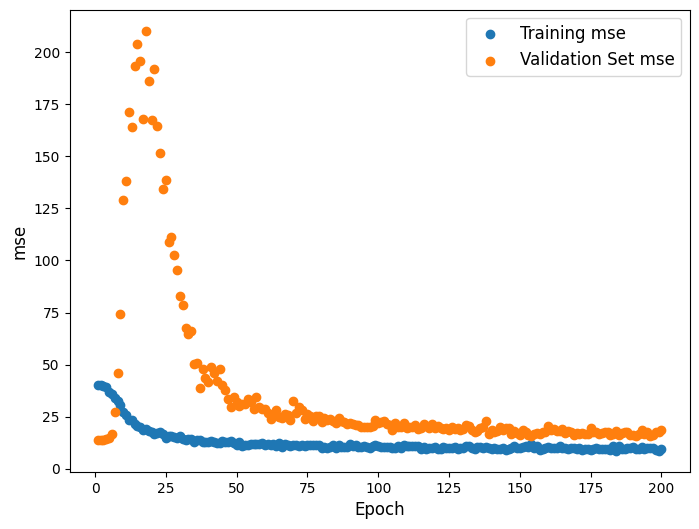

In [33]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,200+1), history_dict['mse'], label = "Training mse")
plt.scatter(range(1,200+1), history_dict['val_mse'], label = "Validation Set mse")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("mse", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

In [34]:
model=models.Sequential(
    [
    layers.BatchNormalization(axis=2),
    layers.SimpleRNN(return_sequences=False, units=128),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=32),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=16),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=8), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation="linear")]
)
model.compile(loss="mean_squared_error",metrics=["mse"])
history = model.fit(X_tt, y_tt,
                    epochs = 190,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 39.1362 - mse: 39.1362 - val_loss: 15.2404 - val_mse: 15.2404
Epoch 2/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 37.6916 - mse: 37.6916 - val_loss: 15.1958 - val_mse: 15.1958
Epoch 3/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.2757 - mse: 38.2757 - val_loss: 16.4938 - val_mse: 16.4938
Epoch 4/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.3468 - mse: 34.3468 - val_loss: 19.0775 - val_mse: 19.0775
Epoch 5/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 34.4093 - mse: 34.4093 - val_loss: 26.3498 - val_mse: 26.3498
Epoch 6/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 34.0843 - mse: 34.0843 - val_loss: 43.6376 - val_mse: 43.6376
Epoch 7/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.4563 - mse: 34.4563 - val_loss: 56.1859 - val_mse: 56.1859
Epoch 8/190
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 31.5422 - mse: 31.5422 - val_loss: 88.8705 - val_mse: 88.8705
Epoch 9/190
13/13 ━━━━━━

In [35]:
pred=model.predict(x=X_test)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred=pred, y_true=y_test)

31.46349334716797

<function matplotlib.pyplot.show(close=None, block=None)>

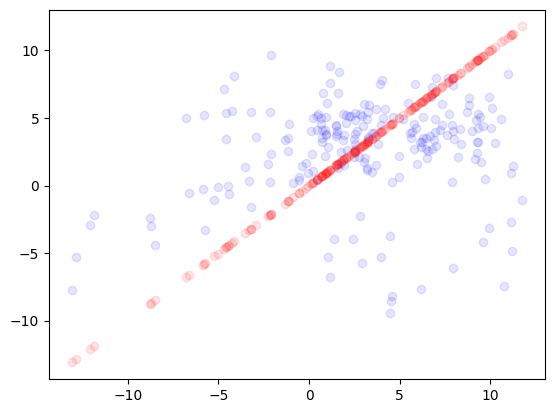

In [37]:
plt.scatter(x=y_test,y=pred,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

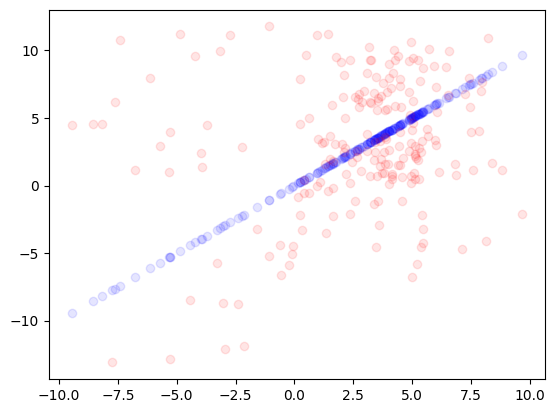

In [38]:
plt.scatter(x=pred,y=pred,c="b",alpha=0.1,label="pred")
plt.scatter(x=pred,y=y_test,c="r",alpha=0.1,label="true")
plt.show